In [2]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
from begepro.dspro import utils as u

import peakutils as pu
from scipy.signal import savgol_filter

In [3]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
filename2='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/energyNotrace/Std-232Th-3Bq-AEcalibration-im010421.npy'

coll=ca.NPYreader(filename,True).get_event()
coll_tot=ca.NPYreader(filename2,False).get_event()

FileNotFoundError: [Errno 2] No such file or directory: '/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'

In [40]:
coll1=coll.subset('ae',0,1.6e-2)
#coll1=coll.subset('ener51563gy',2102,2106)
curr1=coll1.get_curr()
trace1=coll.get_traces()
coll2=coll.subset('ae',1.90e-2,1.95e-2)
curr2=coll2.get_curr()

<IPython.core.display.Javascript object>


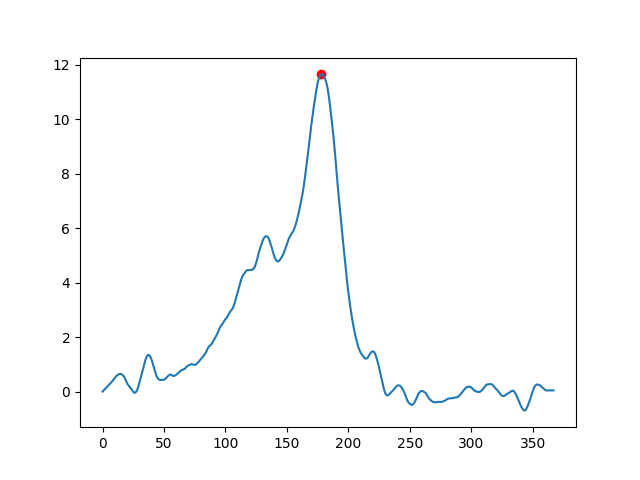

n peaks computed 1
171


<IPython.core.display.Javascript object>


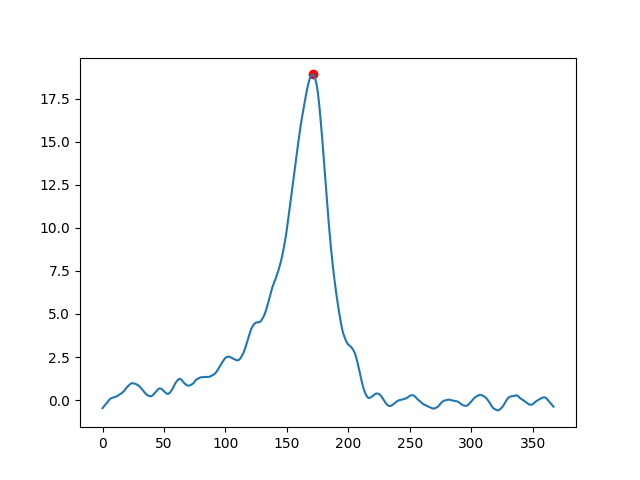

n peaks computed 1


In [62]:
from scipy.signal import find_peaks
#MSE
plt.figure()
i=23
plt.plot(curr1[i])

#reproducing what the peak finder does
indexes=u.n_peaks().compute_n_peaks2(curr1[i])
indexes=find_peaks(curr1[i],prominence=1.0,height=0.10*max(curr1[i]))[0]
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes,curr1[i][indexes],marker='o',color='r')

print(coll1.get_indexes()[i])

#SSE
plt.figure()
plt.plot(curr2[i])
indexes=u.n_peaks().compute_n_peaks2(curr2[i])
print('n peaks computed '+str(len(indexes)))
plt.scatter(indexes,curr2[i][indexes],marker='o',color='r')

<IPython.core.display.Javascript object>


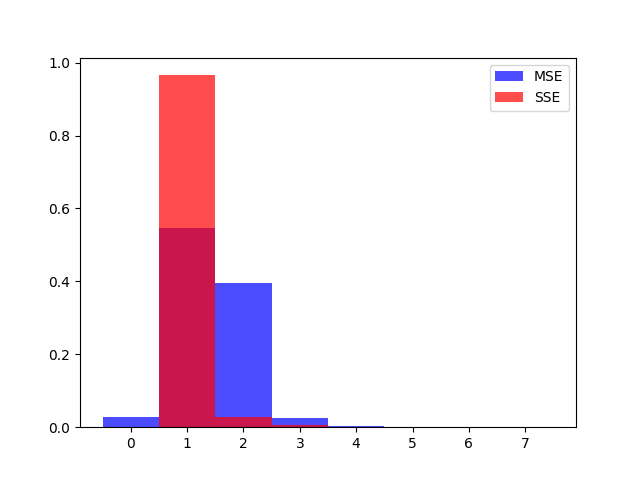

<IPython.core.display.Javascript object>


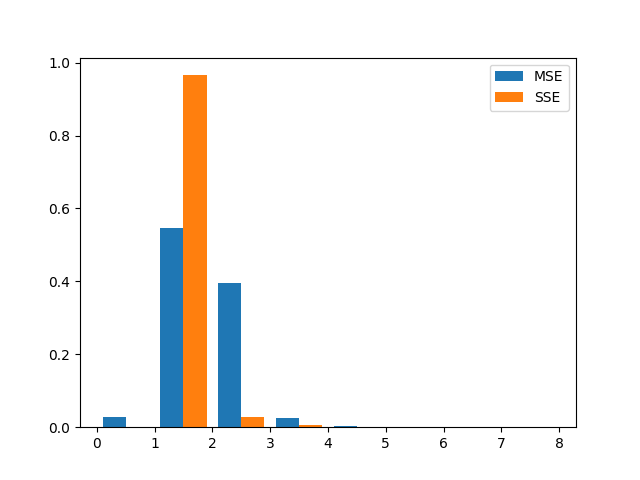

<IPython.core.display.Javascript object>


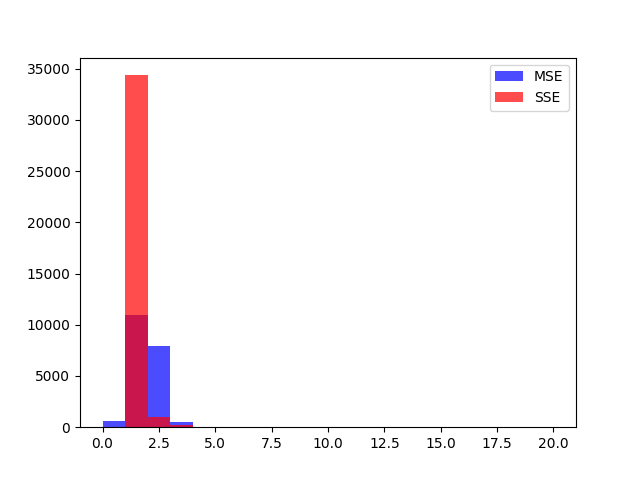

In [30]:
#Distribution of the events
n1=coll1.get_n_peaks()
n2=coll2.get_n_peaks()
plt.figure()
bins=range(9)
plt.hist(n1,color='b',alpha=0.7,bins=bins,density=True,label='MSE',align='left')
plt.hist(n2,color='r',alpha=0.7,bins=bins,density=True,label='SSE',align='left')
plt.xticks(range(8))
plt.legend()

#Same plot 
plt.figure()
plt.hist([n1,n2],bins=bins,density=True,label=['MSE','SSE'])
plt.legend()

#without normalization

n1=coll1.get_n_peaks()
n2=coll2.get_n_peaks()
plt.figure()
bins=np.linspace(0,20,21)
plt.hist(n1,color='b',alpha=0.7,bins=bins,label='MSE')
plt.hist(n2,color='r',alpha=0.7,bins=bins,label='SSE')
plt.legend()

<IPython.core.display.Javascript object>


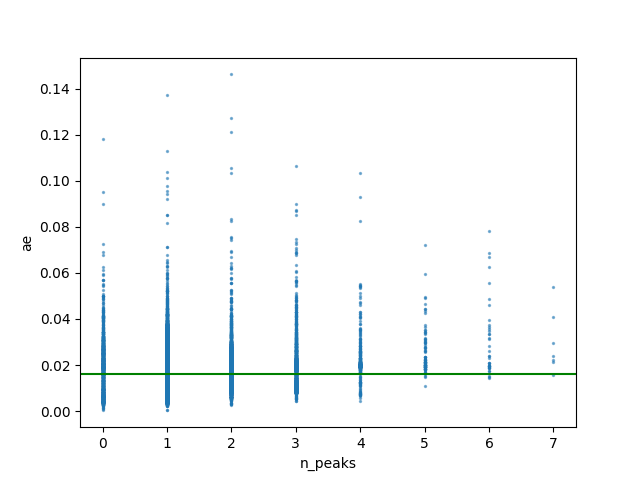

Text(21, 0.018, 'cut_ae')

In [31]:
#Scatter plot
plt.figure()
plt.scatter(coll.get_n_peaks(),coll.get_avse(),s=2,alpha=0.5)
plt.show()

plt.axhline(1.6e-2, color='g')
plt.xlabel('n_peaks')
plt.ylabel('ae')

plt.annotate('cut_ae',(21,1.8e-2))

In [34]:
p=coll.subset('n_peaks',-1,0.5)
p.get_n_peaks().size

1399

In [59]:
from scipy.signal import find_peaks
i=23
trace=p.get_traces()[i]
curr=p.get_curr()[i]

fig,axs=plt.subplots(2,figsize=(9,7))
axs[0].plot(trace)
axs[0].set_title('trace '+str(i))
axs[1].plot(curr)
axs[1].set_title('current '+str(i))

ind=find_peaks(curr,prominence=1.5,height=0.10*max(curr),distance=30)[0]
print(ind)
axs[1].scatter(ind,curr[ind],color='r')

NameError: name 'p' is not defined

<IPython.core.display.Javascript object>


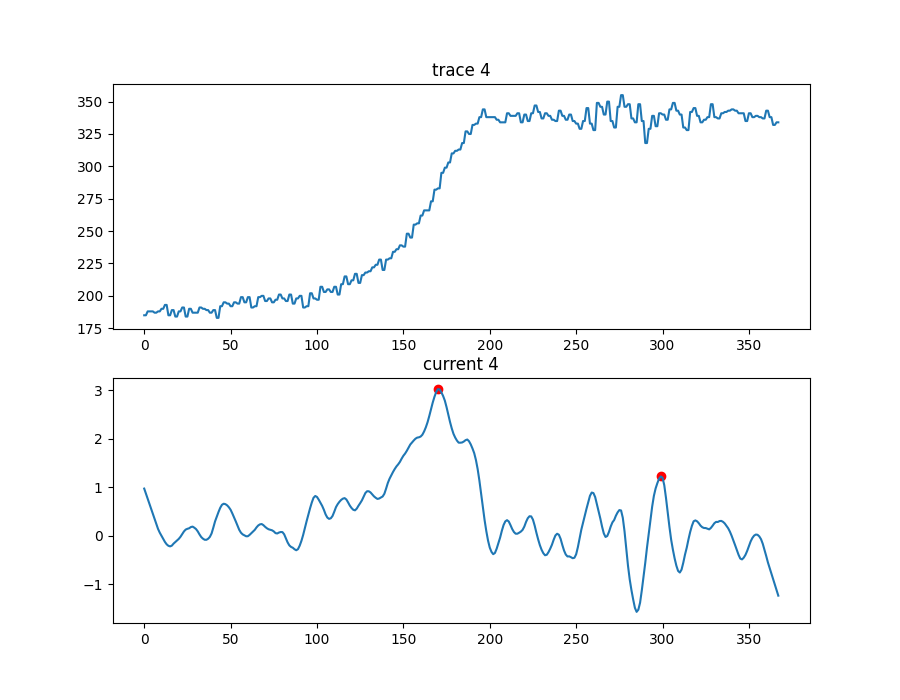

[170 299]


<IPython.core.display.Javascript object>


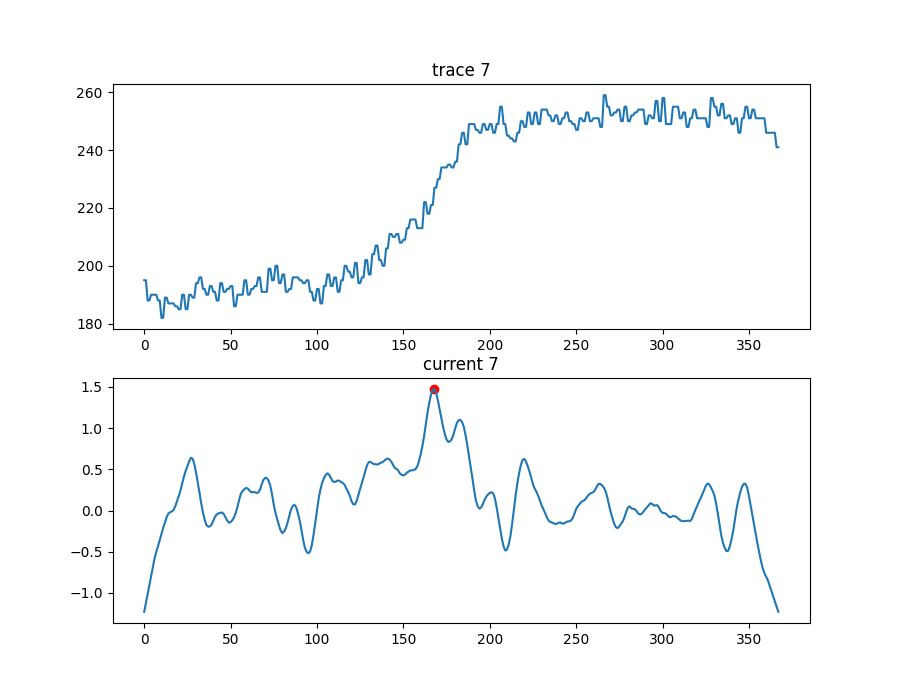

[168]


<IPython.core.display.Javascript object>


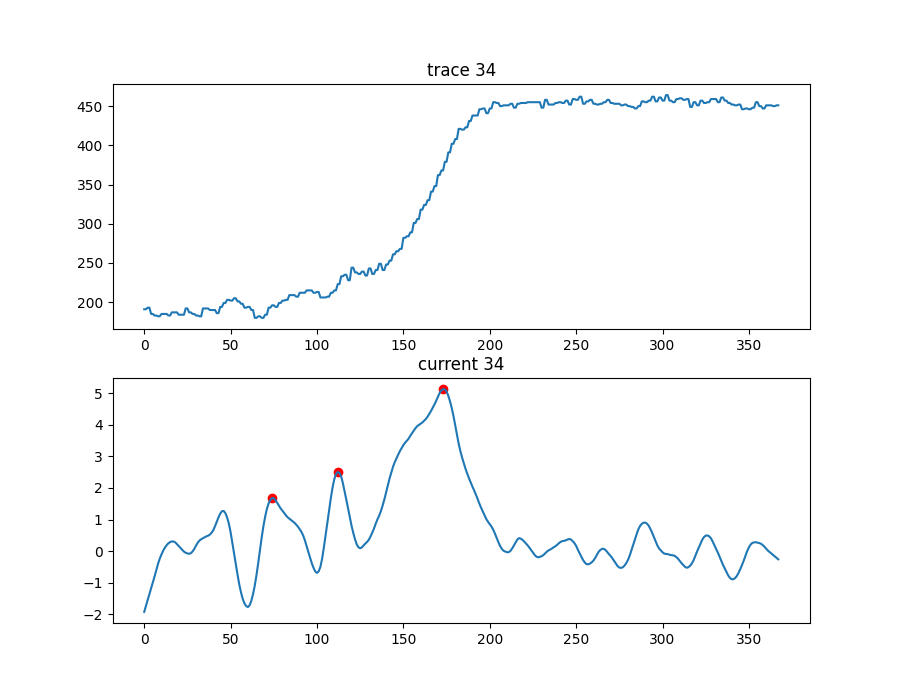

[ 74 112 173]


<IPython.core.display.Javascript object>


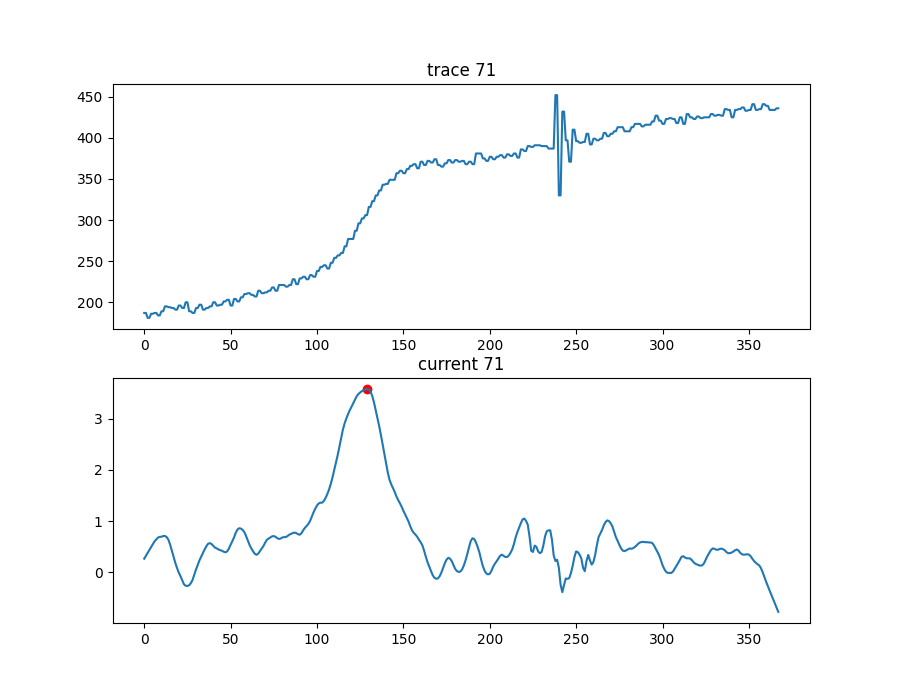

[129]


<IPython.core.display.Javascript object>


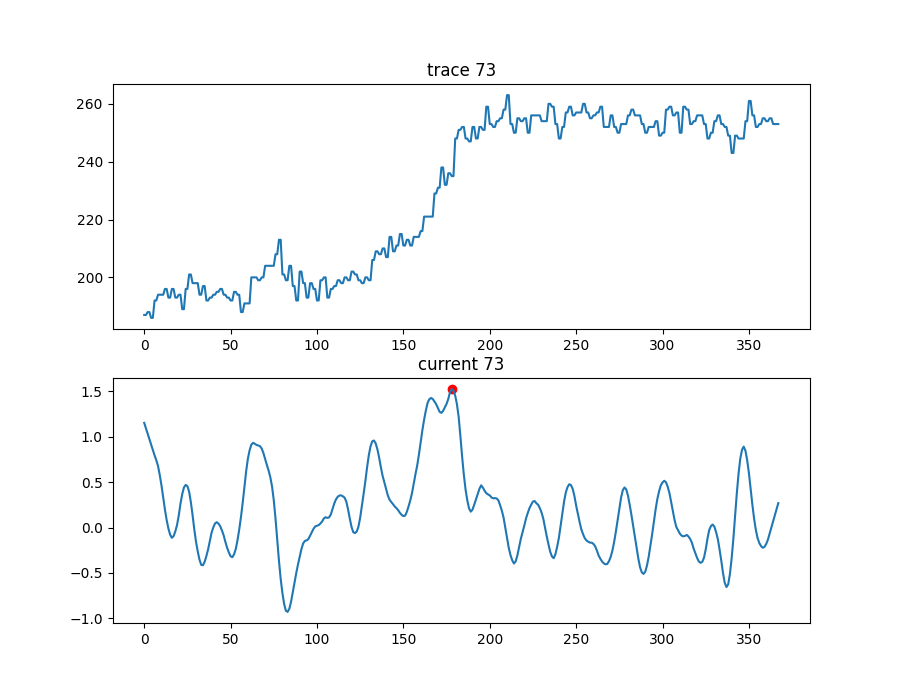

[178]


<IPython.core.display.Javascript object>


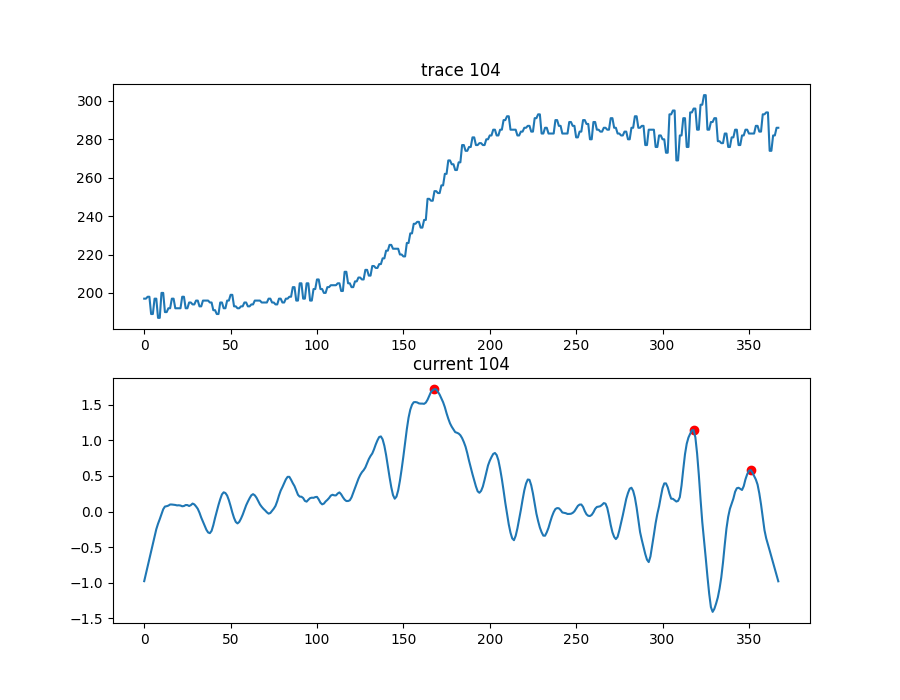

[168 318 351]


<IPython.core.display.Javascript object>


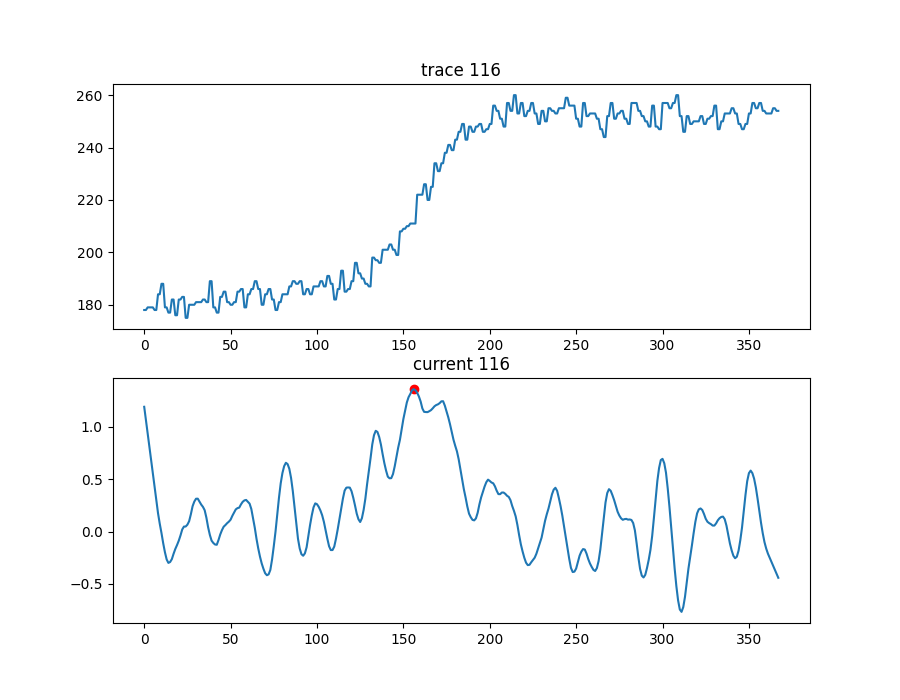

[156]


/tmp/ipykernel_2507/982640205.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axs=plt.subplots(2,figsize=(9,7))


<IPython.core.display.Javascript object>


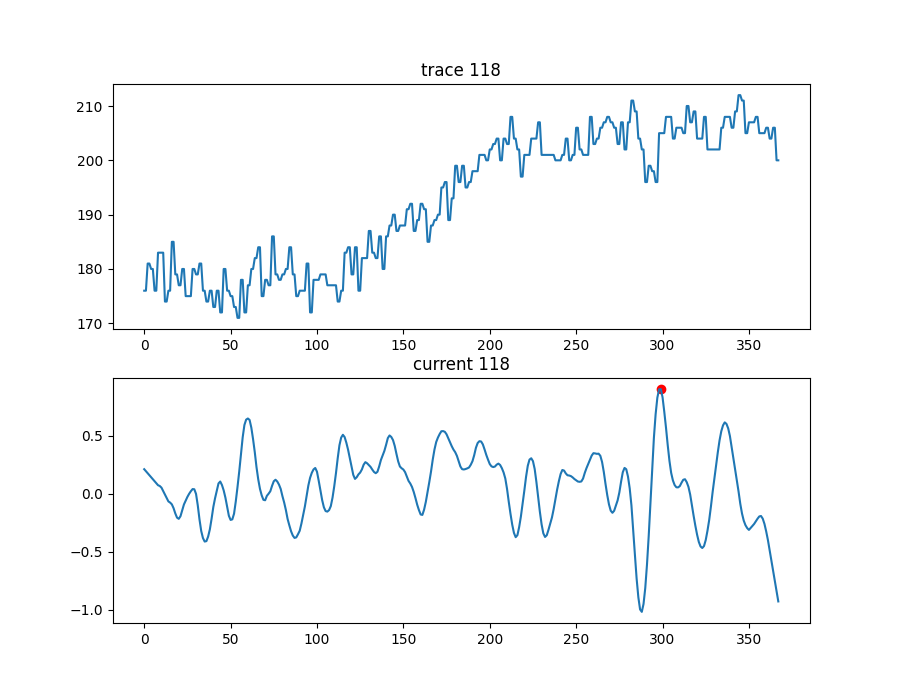

[299]


<IPython.core.display.Javascript object>


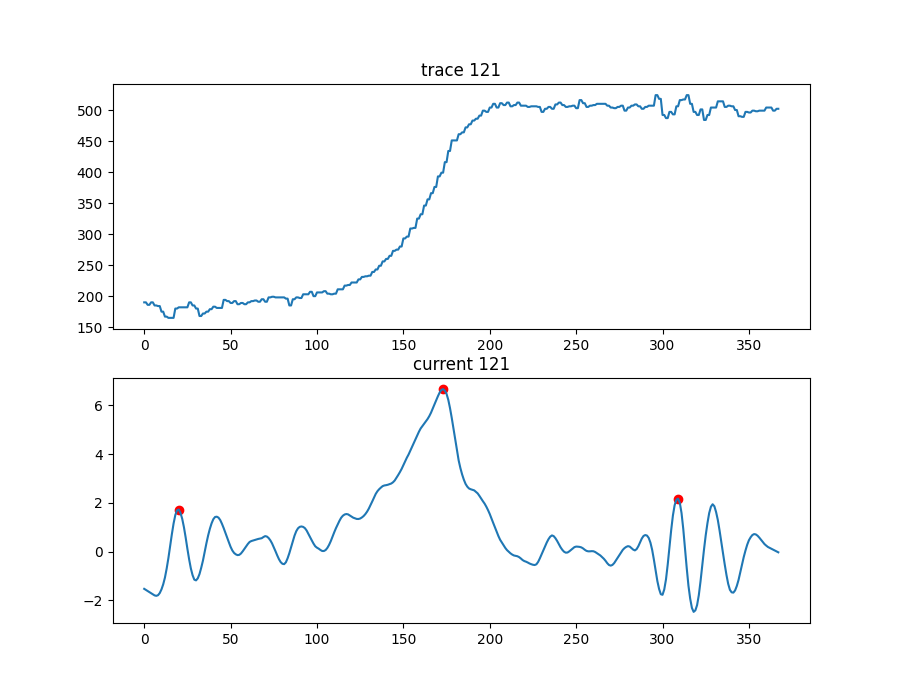

[ 20 173 309]


<IPython.core.display.Javascript object>


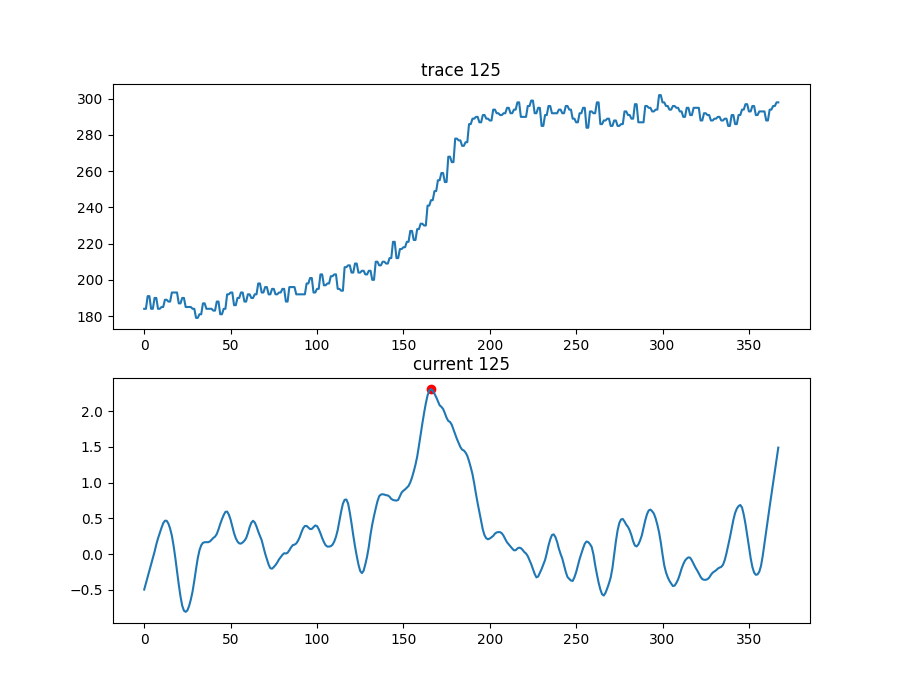

[166]


<IPython.core.display.Javascript object>


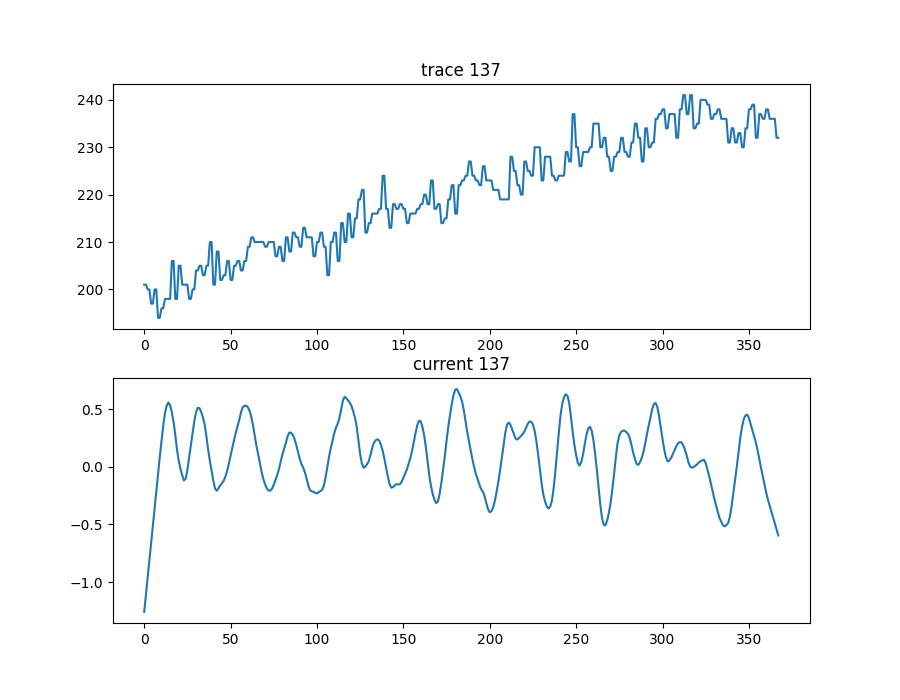

[]


In [76]:
from scipy.signal import find_peaks

index=np.array([4,7,34,71,73,104,116,118,121,125,137])

#index=np.arange(0,10)

i=0

for i in index:
    trace=coll.get_traces()[i]
    curr=coll.get_curr()[i]

    fig,axs=plt.subplots(2,figsize=(9,7))
    axs[0].plot(trace)
    axs[0].set_title('trace '+str(i))
    axs[1].plot(curr)
    axs[1].set_title('current '+str(i))

    ind=find_peaks(curr,prominence=1.5,height=0.10*max(curr),distance=30)[0]
    print(ind)
    axs[1].scatter(ind,curr[ind],color='r')

<IPython.core.display.Javascript object>


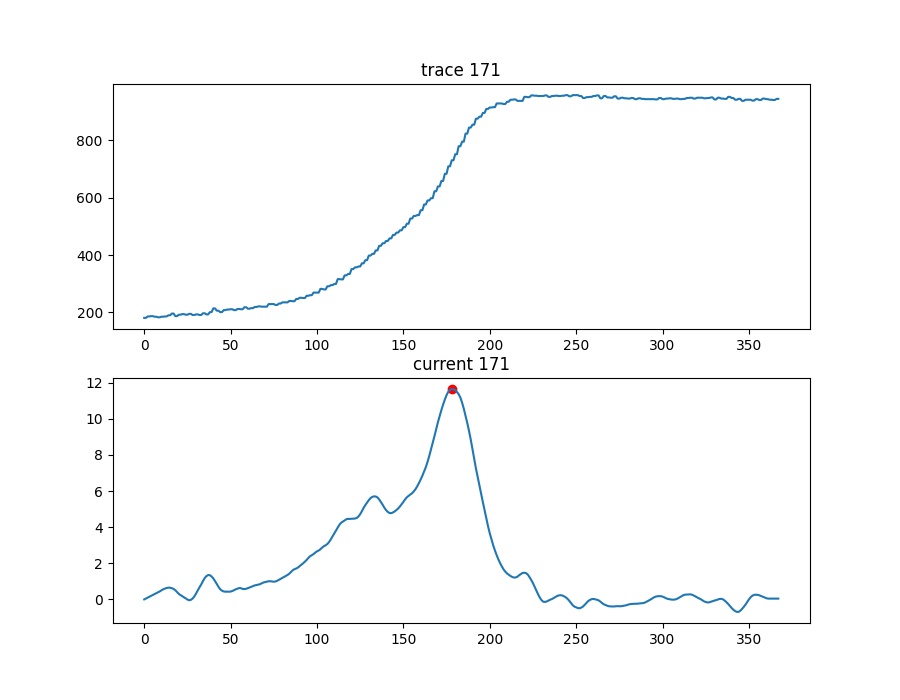

[178]
(array([11.69076943]), array([26]), array([343]))


<IPython.core.display.Javascript object>


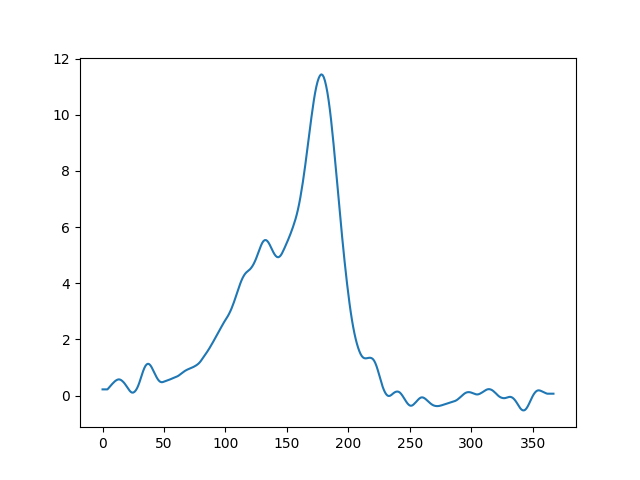

pr:
(array([11.33492523]), array([24]), array([343]))
181


In [63]:
from scipy.signal import peak_prominences
i=171
trace=coll.get_traces()[i]
curr=coll.get_curr()[i]

fig,axs=plt.subplots(2,figsize=(9,7))
axs[0].plot(trace)
axs[0].set_title('trace '+str(i))
axs[1].plot(curr)
axs[1].set_title('current '+str(i))

ind=find_peaks(curr,prominence=1.5,height=0.10*max(curr),distance=30)[0]
print(ind)
print(peak_prominences(curr,ind))
axs[1].scatter(ind,curr[ind],color='r')

f=savgol_filter(curr,10,0)
plt.figure()
plt.plot(f)
print('pr:')
print(peak_prominences(f,ind))

print(trace[0])

8.72e-07
(66, 284)


<IPython.core.display.Javascript object>


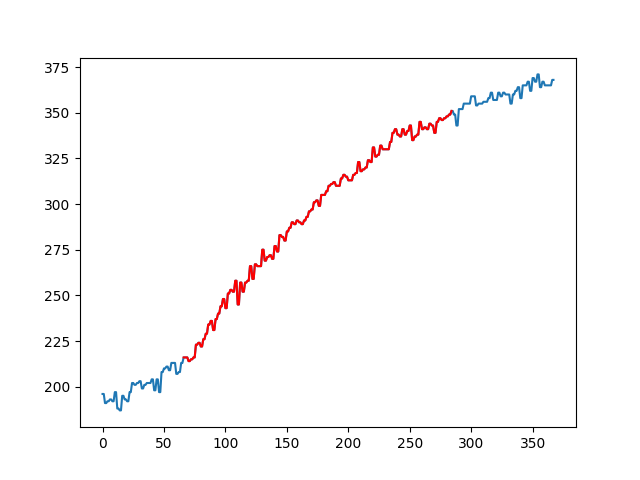

<IPython.core.display.Javascript object>


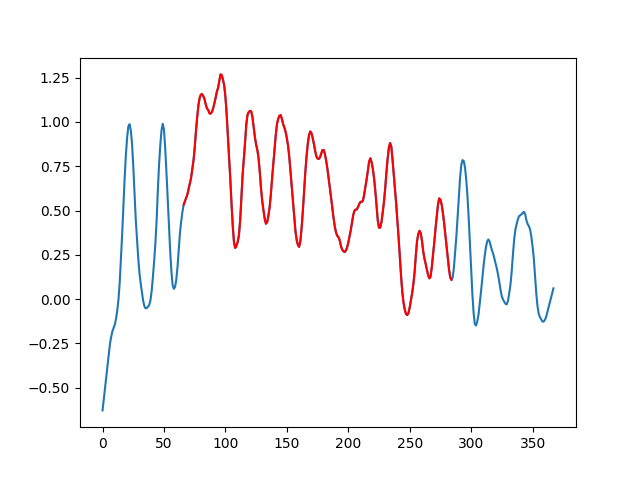

<IPython.core.display.Javascript object>


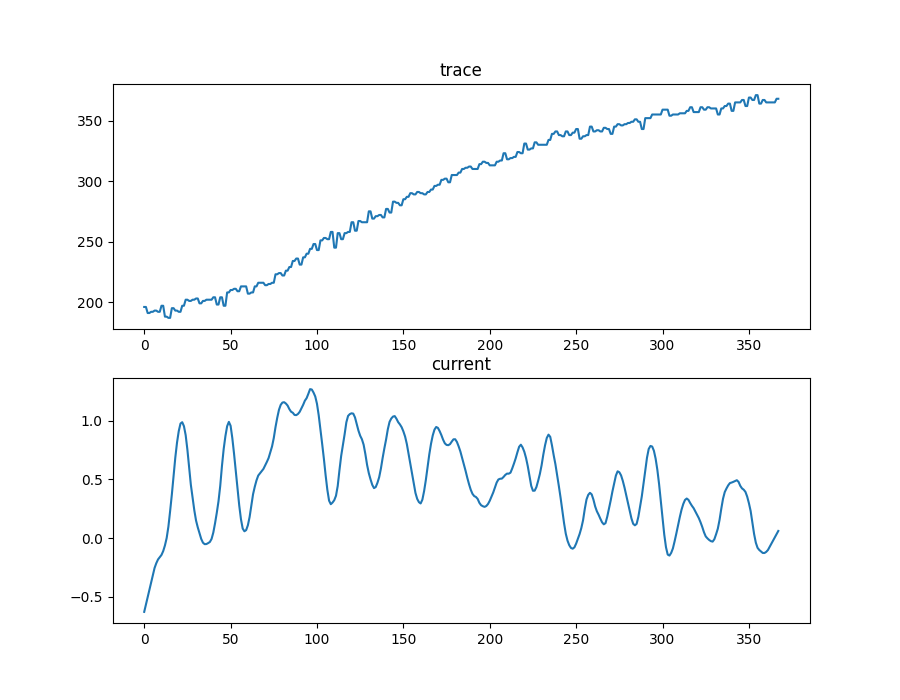

Text(0.5, 1.0, 'current')

In [20]:
i=3306 #low energy
i=73
i=1
i=77 #SSE o MSE?
i=120 #MSE con due picchi di altezza simile
i=137 # se tolgo threshold vede 3 picchi se no 0
i=22 # flat MSE
i=37 #MSE o SSE
i=3306
curr=coll.get_curr()[i]
trace=coll.get_traces()[i]

obj= u.rise_time()
rt,t=obj.compute_rt(trace,4e-9)
print(rt)
print(t)

x=np.arange(0,len(trace))

plt1=plt.figure()
plt.plot(trace)
plt.plot(x[t[0] : t[1]+1],trace[t[0] : t[1]+1],color='r')
plt.show()

plt.figure()
plt.plot(curr)
plt.plot(x[t[0] : t[1]+1],curr[t[0] : t[1]+1],color='r')
plt.show()


fig,axs=plt.subplots(2,figsize=(9,7))
axs[0].plot(trace)
axs[0].set_title('trace')
axs[1].plot(curr)
axs[1].set_title('current')

In [53]:
#Prominence analysis

p1='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/1.5/Std-232Th-3Bq-AEcalibration-im010421.npy'
p2='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/0.5/Std-232Th-3Bq-AEcalibration-im010421.npy'
p3='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/prominence_analysis/0.6/Std-232Th-3Bq-AEcalibration-im010421.npy'


p1=ca.NPYreader(p1,True).get_event().subset('energy',cutmin=750)
p2=ca.NPYreader(p2,True).get_event().subset('energy',cutmin=750)
p3=ca.NPYreader(p3,True).get_event().subset('energy',cutmin=750)


peaks1=p1.get_n_peaks()
peaks2=p2.get_n_peaks()
peaks3=p3.get_n_peaks()

list=np.where((peaks2-peaks3) != 0)[0]
print(len(list))

print('percentage: '+str(len(list)/p1.get_energies().size))

188
percentage: 0.012342436974789915


<IPython.core.display.Javascript object>


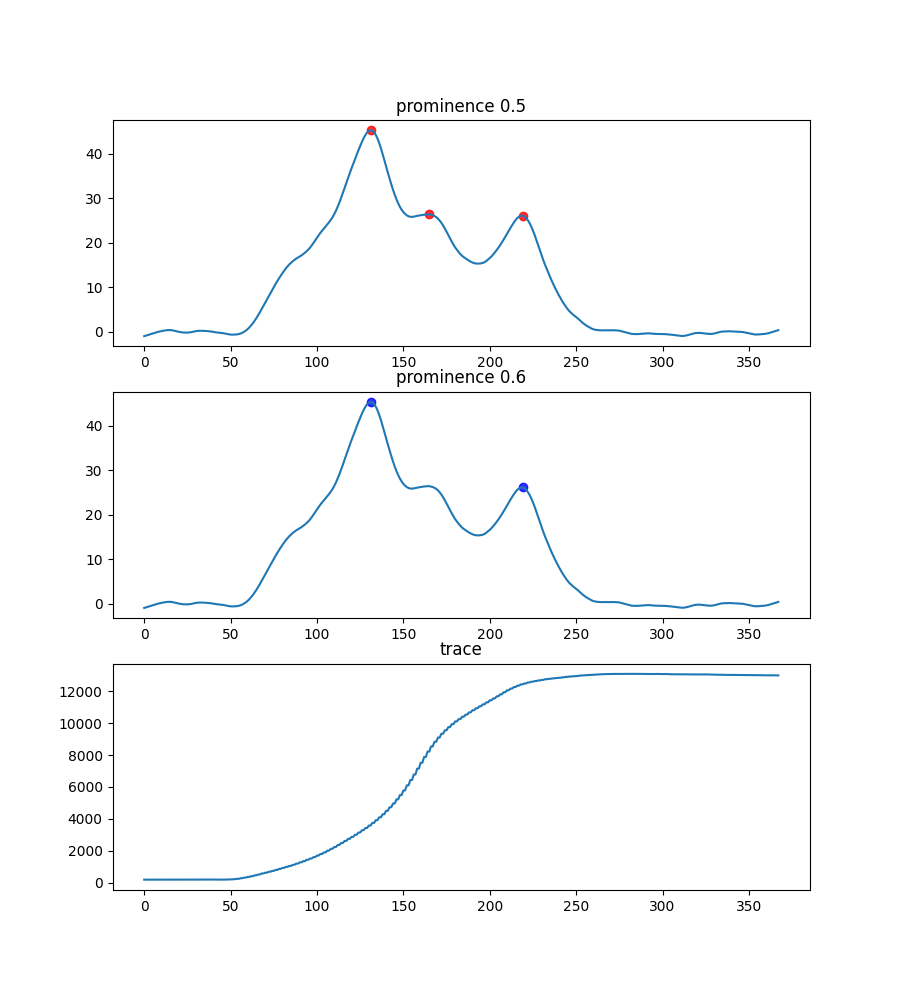

p1: 2
p2: 3
1194


In [56]:
from scipy.signal import find_peaks
i=list[1]
curr=p1.get_curr()[i]

fig,axs=plt.subplots(3,figsize=(9,10))
axs[0].plot(curr)
axs[0].set_title('prominence 0.5')
ind=find_peaks(curr,prominence=0.5,height=0.10*max(curr),distance=10)[0]
axs[0].scatter(ind,curr[ind],color='r',alpha=0.8)

axs[1].plot(curr)
axs[1].set_title('prominence 0.6')
ind=find_peaks(curr,height=0.10*max(curr),prominence=0.6,distance=10)[0]
axs[1].scatter(ind,curr[ind],color='b',alpha=0.8)

axs[2].plot(trace)
axs[2].set_title('trace')

print('p1: '+str(peaks1[i]))
print('p2: '+str(peaks2[i]))

print(p1.get_indexes()[i])

